**Objetivos da aula:**

*   apresentar e aplicar o conceito de FEATURE
*   apresentar e aplicar o conceito de DESCRITORES



**QUAL O PROBLEMA?**

Estamos tentando ao longo do curso computar imagens de forma eficiente. Na última aula aprendemos e usamos a técnica ***template matching***, vimos que é uma técnica simples e poderosa que basicamente convolui uma template em um espaço de busca (Imagem). Contudo, possui algumas fragilidades tais como, escala, rotação e intensidade luminosa.



Queremos encontrar **essa caixa**.
<img src="box.png">

Neste espaço de busca, imagem.
<img src="box_in_scene.png">

**Vamos pensar um pouco...**

Com as técnicas que conhecemos, como podemos fazer essa detecção da caixa??





...

**FEATURES**

Features em visão computacional são detalhes de uma imagem, que fornecem informações sobre o que ela significa. Já conhecemos e aplicamos técnicas para detecção por cor e contorno, por exemplo.

Hoje, vamos conhecer uma técnica que extrai da imagem uma descrição local com pontos de interesse (key points), desta forma criamos uma assinatura para cada ponto da imagem, a ideia é maximizar pontos que apresentam que apresentam invariância a rotação, escala e translação. Assim conseguimos buscar e encontrar esses pontos em outras imagens.

Os principais algoritmos são:

SIFT,ORB, SURF, FAST, BRISK

Onde usamos esses algoritmos?

    Reconhecimento de objetos
    alinhamento de imagens (imagens panorâmicas)
    reconstrução 3d
    tracking de imagem
    indexação de imagem (banco de imagem)
    

    



### Reconhecimento de imagem no espaço de busca


Vamos usar a imagem acima para aplicar esse método.

Vamos usar o método ORB, é semelhante ao SIFT, mas não é patenteado.


https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_orb/py_orb.html

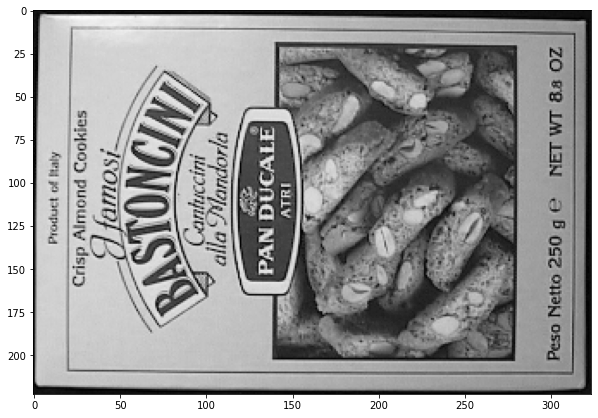

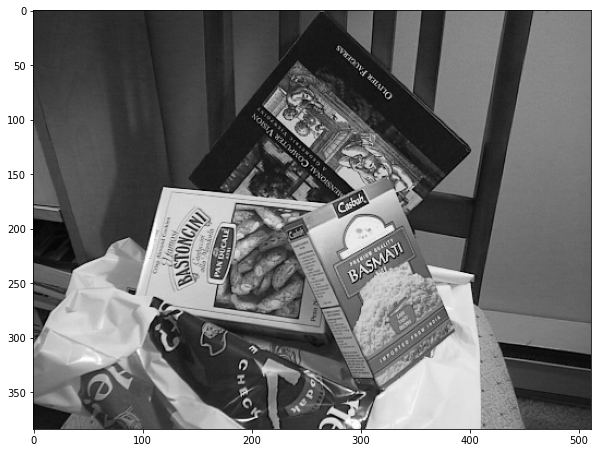

In [12]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

# carrega as imagens
img1 = cv2.imread('box.png',0)
img2 = cv2.imread('box_in_scene.png',0)

#template
plt.figure(figsize = (10,10))
plt.imshow(img1, cmap="gray"); plt.show();

# Imagem espaço de busca
plt.figure(figsize = (10,10))
plt.imshow(img2, cmap="gray"); plt.show();


In [13]:
# inicializa com o construtor ORB
orb = cv2.ORB_create()


In [14]:
# Detecta os keypoints
#kp = orb.detect(img1,None)
# Computa os Descritores
#orb_tuple = orb.compute(img1, kp)

#Podemos usar uma função que calcula os keypoints e Descritores
kp1, des1 = orb.detectAndCompute(img1,None)


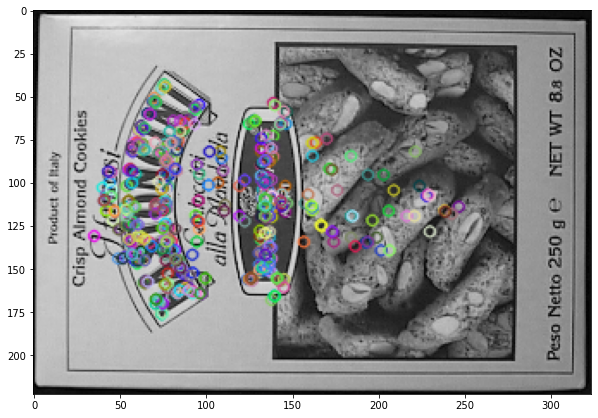

In [15]:
# Desenha os keypoints na imagem 
gray2 = cv2.drawKeypoints(img1, kp1, outImage=np.array([]), flags=0)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(gray2, cv2.COLOR_BGR2RGB));


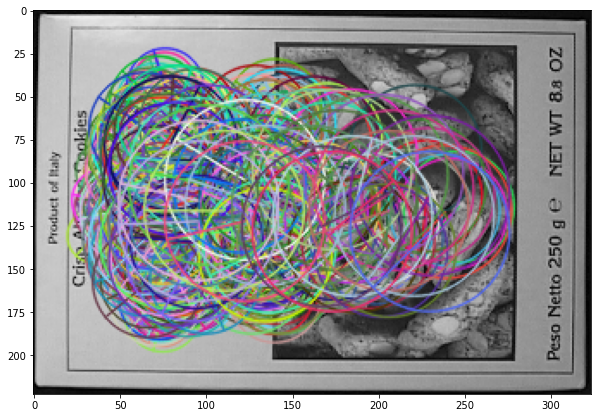

In [16]:
# Os keypoints são formados dos gradientes da imagem naquele ponto, por essa razão possuem amplitude e direção
gray3 = cv2.drawKeypoints(img1, kp1, outImage=np.array([]), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(gray3, cv2.COLOR_BGR2RGB))

## Desafio 1

Por default os métodos descritores quando são criados estão configurados para encontrar 500 features na imagem.

Busque na documentação da OpenCV como alterar esse parâmetro e descubra quais outros parâmetros podem ser configurados no método ***cv2.orb_create()***


https://docs.opencv.org/3.4/db/d95/classcv_1_1ORB.html


In [17]:
### Implemente sua solução aqui.....










O resultado para 4 features, nessa imagem conseguimos visualizar os keypoints e sua direção e amplitude do vetor gradiente resultante.
<img src="box_4features.png">

## Continuando...

Agora já possuímos a "assinatura" da nossa caixa de cereais.

Vamos realizar a detecção e descrições dos keypoints da imagem do espaço de busca.




## Desafio 2

Faça um código que calcula os keypoints para a imagem no espaço de busca. Compare a caixa de cereal das duas imagens (box e box_in_scene), existe correlação entre todos os keypoints?

In [18]:
## Implemente sua solução aqui......







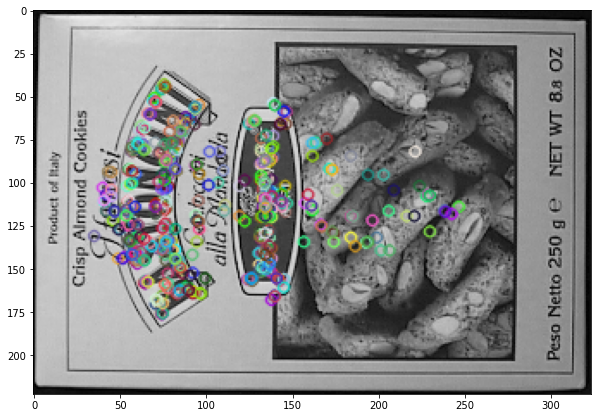

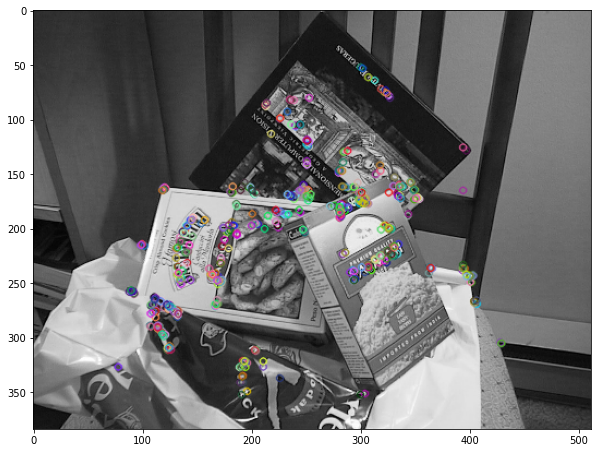

In [19]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

# carrega as imagens
img1 = cv2.imread('box.png',0)
img2 = cv2.imread('box_in_scene.png',0)

# inicializa com o construtor ORB
orb = cv2.ORB_create()

#Podemos usar uma função que calcula os keypoints e Descritores
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)


gray1 = cv2.drawKeypoints(img1, kp1, outImage=np.array([]), flags=0)
gray2 = cv2.drawKeypoints(img2, kp2, outImage=np.array([]), flags=0)


#template
plt.figure(figsize = (10,10))
plt.imshow(gray1); plt.show();

# Imagem espaço de busca
plt.figure(figsize = (10,10))
plt.imshow(gray2); plt.show();


## Fazendo o match...

Visualmente podemos ter uma intuição se existe matching entre os keypoints, mas na vamos usar a função ***cv2.BFMatcher()***


Foram encontrados: 149 matches


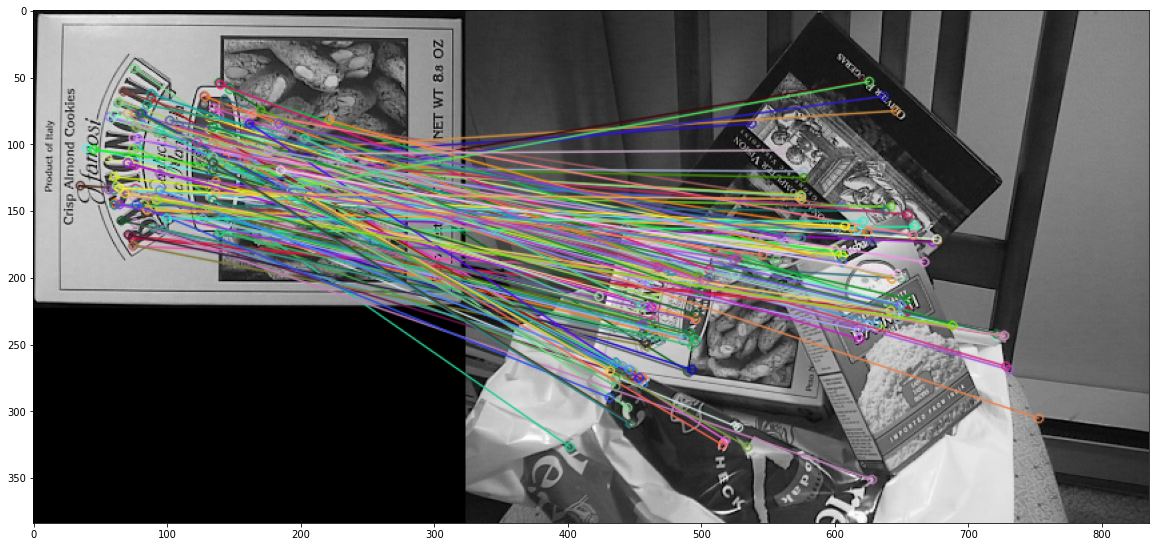

In [34]:
# cria o objeto bf (best featuare)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# a função match devolve os matches encontrados
matches = bf.match(des1,des2)

print("Foram encontrados: {} matches".format(len(matches)))

img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches,None, flags=2)

plt.figure(figsize = (20,10))
plt.imshow(img3); plt.show();


Parece que o resultado não foi o que estávamos esperando... mas nem tudo está perdido ainda. vamos fazer alguns ajustes nas funções matches e na quantidade keypoints printados. Muitos keypoints são falsos positivos.

Primeiro, vamos ordenar o vetor matches para ficar de acordo com a distância entre os descritores. Quanto mais baixo, melhor.


### Pausa para uma dica Python

ordenação de vetor e função lambda, veja como é simples :)


In [1]:
## Vamos dar uma olhada em duas funções novas do python. sorted() e lambda

# essa a lista de compra da feira, item e preço.

lista = [
    ('Banana', 18),
    ('Maça', 1),
    ('Goiaba', 20),
    ('Uva', 22),
    ('Pera', 12)
]

print("lista não ordenada: ",lista) # lista não ordenada

lista_ord = sorted(lista)

print("lista ordenada ordem alfabetica: ",lista_ord) # lista ordenada por indice a..z

lista_ord_pre = sorted(lista, key= lambda x:x[1])

print("lista ordenada por preço: ",lista_ord_pre) # lista ordenada pelo preço

lista não ordenada:  [('Banana', 18), ('Maça', 1), ('Goiaba', 20), ('Uva', 22), ('Pera', 12)]
lista ordenada ordem alfabetica:  [('Banana', 18), ('Goiaba', 20), ('Maça', 1), ('Pera', 12), ('Uva', 22)]
lista ordenada por preço:  [('Maça', 1), ('Pera', 12), ('Banana', 18), ('Goiaba', 20), ('Uva', 22)]


### Voltando ao nosso problema

### Resultado de match

O resultado de matches = bf.match(des1,des2) devolve uma lista de objetos do tipo DMatch. Os atributos são:

 - DMatch.distance - Distancia entre os descritores da menor para maior distância. (Quanto menor melhor)
 - DMatch.trainIdx - Index of the descriptor in train descriptors
 - DMatch.queryIdx - Index of the descriptor in query descriptors
 - DMatch.imgIdx - Index of the train image.

In [22]:
# ordenamos o vetor matches para ficar os melhores (menor distancia) no inicio da lista

matches = sorted(matches, key = lambda x:x.distance)


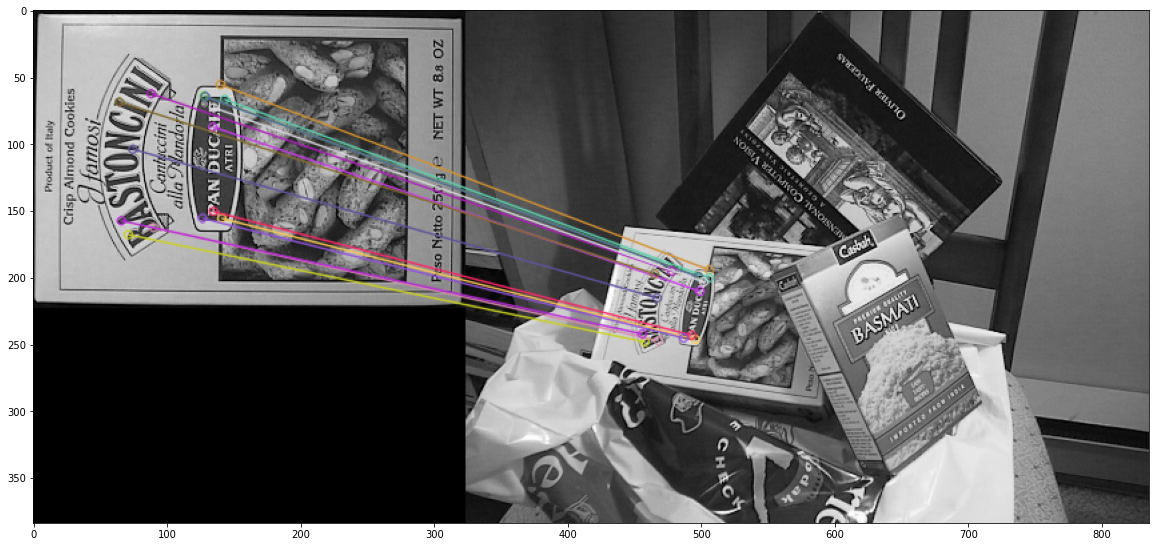

In [23]:
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:15],None, flags=2)


plt.figure(figsize = (20,10))
plt.imshow(img3); plt.show();

## Desafio 3 

Refaça este notebook utilizando o método SIFT. 

Dicas: No início do código, basta trocar o orb por sift.


Para a função ***cv2.BFMatcher()*** use o método baseado em KNN ***knnMatch()***

ref:
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html


In [24]:
## implemente sua solução aqui......







## Desafio 4

Implemente um código em python .py que realiza a detecção em tempo real da webcam. Sugestão: como template, escolha um livro, ou algo semelhante.